## Applying Latent Dirichlet Allocation (LDA) Topic Modelling using Python on Scopus Textual Corpus
### University of Ljubljana - Doctoral Summer School 2024: Quantitative Approaches to Literature Reviews Project
- Author: Amr Mohamed - aamrfarouqaa@gmail.com
- Lecturer: Ivan Zupic - i.zupic@gold.ac.uk

In [1]:
# import necessary packages
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import math

In [2]:
# Read the text file
with open('scopusLargeDataWithLinks.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

In [3]:
# Initialize lists to hold titles and abstracts
titles = []
abstracts = []

# Extract titles and abstracts
title = ""
abstract = ""
collecting_abstract = False

In [4]:
for line in lines:
    line = line.strip()
    if line.startswith("TITLE::: "):
        if title:  # Save the previous title and abstract if they exist
            titles.append(title)
            abstracts.append(abstract)
            title = ""
            abstract = ""
        title = line[len("TITLE::: "):].strip()
        collecting_abstract = False
    elif line.startswith("ABSTRACT::: "):
        collecting_abstract = True
        abstract = line[len("ABSTRACT::: "):].strip()
    elif collecting_abstract:
        abstract += " " + line  # Continue collecting the abstract

In [5]:
# Append the last title and abstract if they exist
if title and abstract:
    titles.append(title)
    abstracts.append(abstract)

In [6]:
# Check for mismatched lengths
if len(titles) != len(abstracts):
    print(f"Mismatch detected: {len(titles)} titles and {len(abstracts)} abstracts")
    print("Titles and Abstracts lists:")
    for t, a in zip(titles, abstracts):
        print(f"Title: {t}\nAbstract: {a}\n")
    raise ValueError("Mismatch between number of titles and abstracts. Check the parsing logic and the input file.")


In [7]:
# Create the dictionary
data = {
    'title': titles,
    'abstract': abstracts
}

In [8]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

In [9]:
# Display the DataFrame
print(df)

                                                   title  \
0      An EEG motor imagery dataset for brain compute...   
1      Motor imagery electroencephalography channel s...   
2      Enhanced performance of EEG-based brain–comput...   
3      Self-supervised motor imagery EEG recognition ...   
4      Classification of motor imagery using chaotic ...   
...                                                  ...   
10242  New classification techniques for electroencep...   
10243  A hybrid brain-computer interface-based mail c...   
10244  Embedded prediction in feature extraction: App...   
10245  Noise reduction in brainwaves by using both EE...   
10246  Optimal EEG channel selection for motor imager...   

                                                abstract  
0      The brain-computer interface (BCI) is a techno...  
1      Electroencephalography (EEG) motor imagery (MI...  
2      Electroencephalograph (EEG) has been a reliabl...  
3      Objective. Aiming for the research o

In [10]:
# Combine title and abstract into one field for topic modeling
df['combined_text'] = df['title'] + " " + df['abstract']

# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the combined text into a document-term matrix
doc_term_matrix = count_vectorizer.fit_transform(df['combined_text'])

# Set the number of topics ###############################################################
n_topics = 10

# Initialize the Latent Dirichlet Allocation (LDA) model
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)  # Adjust the number of topics (n_components) as needed

# Fit the LDA model to the document-term matrix
lda.fit(doc_term_matrix)

LatentDirichletAllocation(random_state=0)

In [11]:
# Display the top words for each topic
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

# Number of top words to display %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
num_top_words = 10

# Get the feature names (words) from the CountVectorizer
feature_names = count_vectorizer.get_feature_names_out()

# Display the topics
display_topics(lda, feature_names, num_top_words)

Topic 1:
ssvep visual based state bci evoked steady frequency brain stimuli
Topic 2:
brain bci control computer eeg interface based human using signals
Topic 3:
bci eeg brain computer based p300 interface using electrodes used
Topic 4:
eeg feature signals classification based method features signal analysis using
Topic 5:
eeg classification using signals accuracy recognition brain emotion speech features
Topic 6:
spatial method classification proposed based eeg csp bci features feature
Topic 7:
based domain learning source using network neural multi fuzzy information
Topic 8:
eeg motor classification bci imagery brain mi signals based accuracy
Topic 9:
eeg data learning based model deep signals neural network classification
Topic 10:
bci motor brain eeg movement patients rehabilitation training stroke based


In [12]:
# Dynamic Visualization of the topics
def visualize_topics(model, feature_names, num_top_words, n_topics):
    n_cols = 5
    n_rows = math.ceil(n_topics / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4), sharex=True)
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-num_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}', fontsize=16)
        ax.invert_yaxis()
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        ax.tick_params(axis='both', which='major', labelsize=12)
    
    # Hide any unused subplots
    for i in range(topic_idx + 1, len(axes)):
        fig.delaxes(axes[i])
    
    fig.suptitle('BCI & EEG - LDA Topics - Top Words - 10,246 Documents', fontsize=22)
    plt.tight_layout()
    plt.show()

##

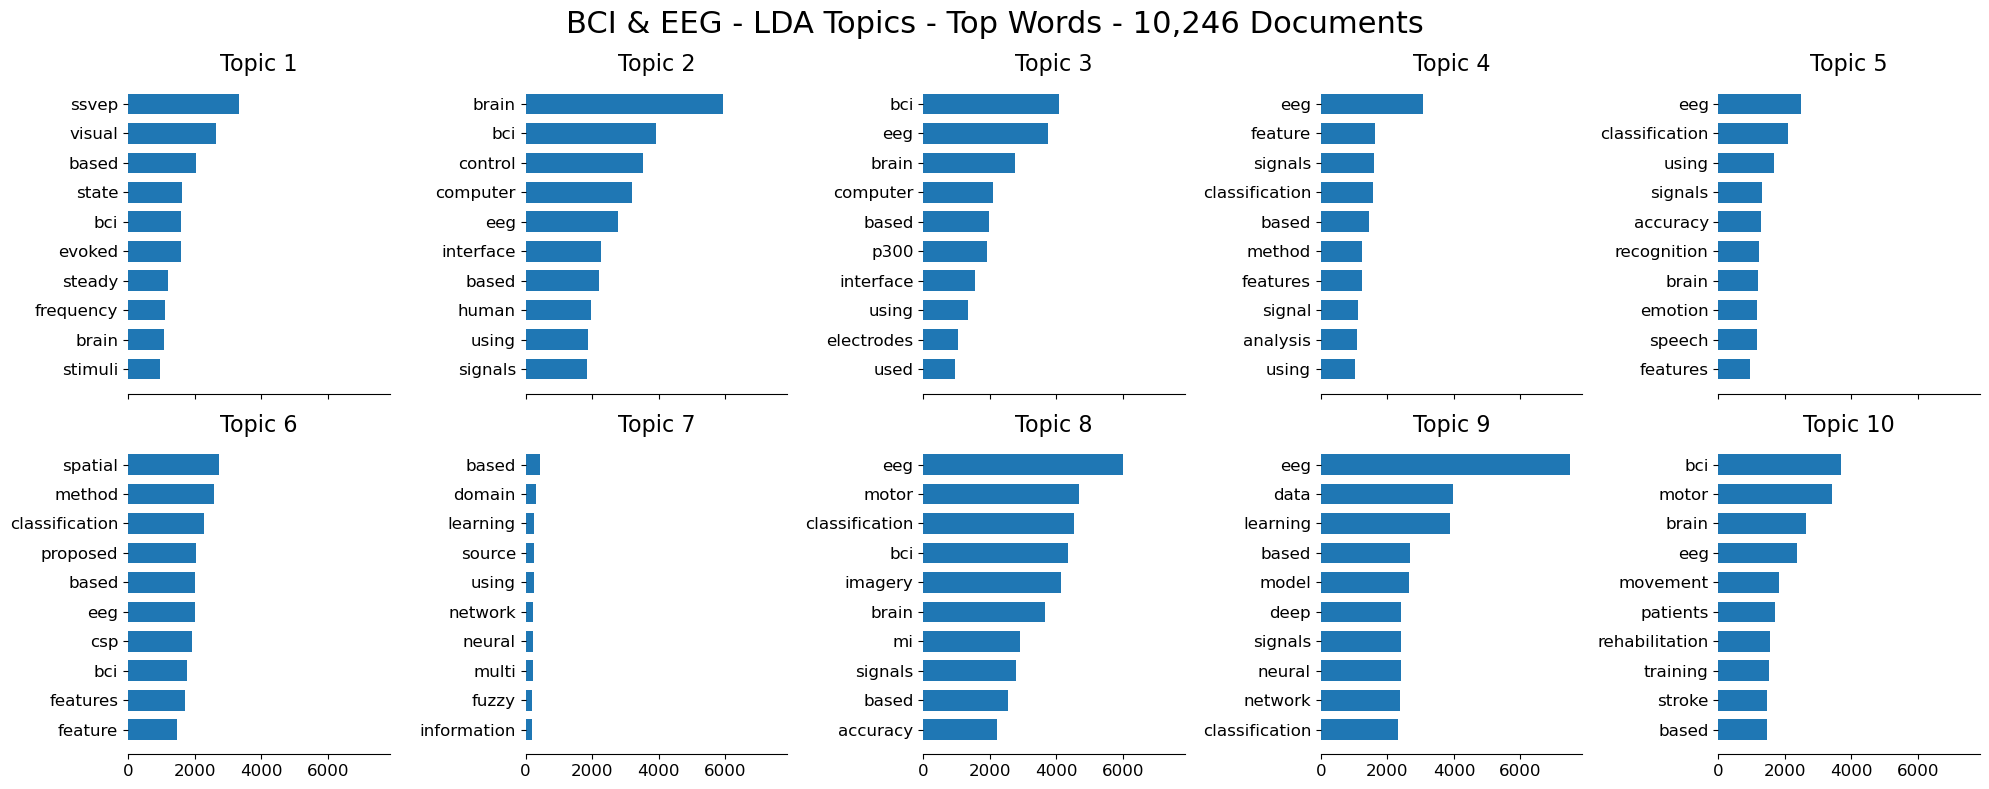

In [13]:
# Visualize the topics
visualize_topics(lda, feature_names, num_top_words, n_topics)